In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('../data/Budget Survey (Responses) - Form Responses 1.csv')
df.head()

,Timestamp,"In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes.",Please indicate your student number.,Year Level,College,Course,How much is your average weekly allowance?,Are you currently residing outside of your permanent residence? (dorm/apartment/condominium),"How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Food]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Transportation]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Personal Expenses]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Miscellaneous]",Do you get to save by the end of the week?,"Are you satisfied with your budget system? (Achieving budget satisfaction means comfortably covering essentials, enjoying discretionary spending, and saving for future goals.)"
0,10/1/2023 9:18:56,Yes,2022-12666,2,College of Engineering,BS Mechanical Engineering,1.000000e-07,No,Very High Priority,High Priority,Very Low Priority,Low Priority,Yes,Completely Satisfied
1,10/1/2023 14:25:12,Yes,2022-07299,1,Virata School of Business,BA Business Administration,1.500000e+03,Yes,Very High Priority,Low Priority,High Priority,Very Low Priority,Yes,Moderately Satisfied
2,10/1/2023 21:49:30,Yes,2021-21191,2nd year,College of Science,BS Geology,1.000000e+03,No,High Priority,Very High Priority,Very Low Priority,Low Priority,Yes,Moderately Satisfied
3,10/1/2023 22:58:27,Yes,2022-06241,2nd,School of Economics,BS Economics,3.000000e+03,No,High Priority,Very Low Priority,Very High Priority,Low Priority,Yes,Completely Satisfied
4,10/2/2023 10:25:59,Yes,2021-05731,1at,College of Home Economics,BS Clothing Technology,1.100000e+03,No,Low Priority,Very High Priority,High Priority,Very Low Priority,No,Moderately Satisfied


Column names are way too long.

In [22]:
df.columns

Index(['Timestamp',
       'In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes. ',
       'Please indicate your student number.', 'Year Level', 'College',
       'Course', 'How much is your average weekly allowance?',
       'Are you currently residing outside of your permanent residence? (dorm/apartment/condominium)',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Food]',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Transportation]',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Personal Expenses]',
       'How would you rank where to allocate your budget among the f

In [23]:
df.columns = [
    'timestamp',
    'data_privacy',
    'student_number',
    'year',
    'college',
    'course',
    'average_weekly_allowance',
    'in_dorm_residence',
    'food_allocation',
    'transpo_allocation',
    'personal_expense_allocation',
    'misc_allocation',
    'savings',
    'budgetting_satisfaction'
]

In [24]:
df.head()

,timestamp,data_privacy,student_number,year,college,course,average_weekly_allowance,in_dorm_residence,food_allocation,transpo_allocation,personal_expense_allocation,misc_allocation,savings,budgetting_satisfaction
0,10/1/2023 9:18:56,Yes,2022-12666,2,College of Engineering,BS Mechanical Engineering,1.000000e-07,No,Very High Priority,High Priority,Very Low Priority,Low Priority,Yes,Completely Satisfied
1,10/1/2023 14:25:12,Yes,2022-07299,1,Virata School of Business,BA Business Administration,1.500000e+03,Yes,Very High Priority,Low Priority,High Priority,Very Low Priority,Yes,Moderately Satisfied
2,10/1/2023 21:49:30,Yes,2021-21191,2nd year,College of Science,BS Geology,1.000000e+03,No,High Priority,Very High Priority,Very Low Priority,Low Priority,Yes,Moderately Satisfied
3,10/1/2023 22:58:27,Yes,2022-06241,2nd,School of Economics,BS Economics,3.000000e+03,No,High Priority,Very Low Priority,Very High Priority,Low Priority,Yes,Completely Satisfied
4,10/2/2023 10:25:59,Yes,2021-05731,1at,College of Home Economics,BS Clothing Technology,1.100000e+03,No,Low Priority,Very High Priority,High Priority,Very Low Priority,No,Moderately Satisfied


## Data Preprocessing

In [25]:
df['year'].unique()

array(['2', '1', '2nd year', '2nd', '1at', '3rd year', 'IV', '2nd Year',
       '5th', 'Third', 'Sophomore '], dtype=object)

In [26]:
year_map = {
    '2nd year': 2,
    '2nd': 2,
    '1at': 2,
    '3rd year': 3,
    'IV': 4,
    '2nd Year': 2,
    '5th': 5,
    'Third': 3,
    'Sophomore ': 2,
    '1': 1,
    '2': 2,
}
df['year'] = df['year'].map(year_map)

In [27]:
df['year'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

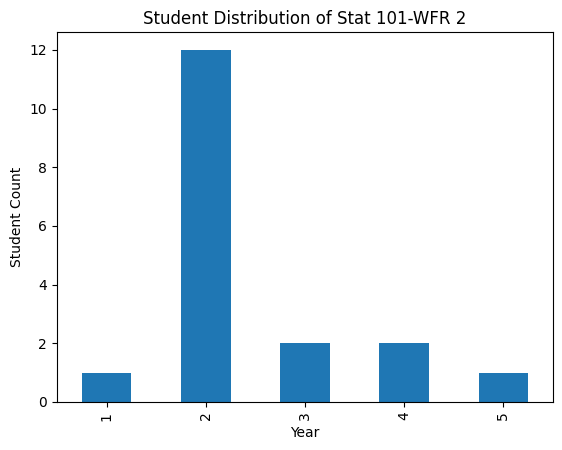

In [33]:
df.groupby(['year']).size().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Student Count')
plt.title('Student Distribution of Stat 101-WFR 2')
plt.show()

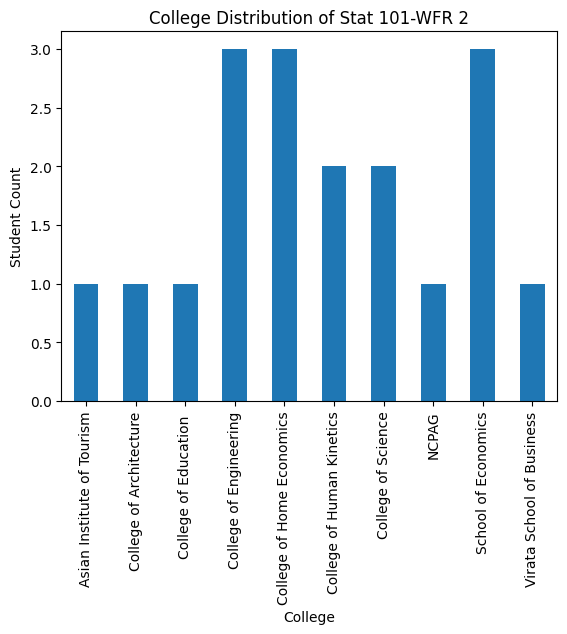

In [35]:
df.groupby(['college']).size().plot(kind='bar')
plt.xlabel('College')
plt.ylabel('Student Count')
plt.title('College Distribution of Stat 101-WFR 2')
plt.show()
# gawing horizontal bar chart